https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence


def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array([
            resize(imread(file_name), (200, 200))
               for file_name in batch_x]), np.array(batch_y)

In [1]:
import math
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 텐서플로 설치 - cpu
# !pip install tensorflow # GPU 버전
# pip install tensorflow-cpu # CPU 버전
from tensorflow import keras

In [2]:
Aclass DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle=True):
        self.batch_size = batch_size
        self.fold = fold
        self.image_size = image_size
        self.mode = mode
        self.shuffle = shuffle
        
        self.df = pd.read_csv(csv_path) # csv 파일 불러오기
        
        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold'] == self.fold]
            
        self.on_epoch_end() # 훈련 중 epoch이 끝날 때 호출되는 함수, 비동기식 함수
        '''
        def on_ephch_end(self, epoch) :
        # keras.utils.Sequence인 상위 클래스에 속한 메소드 함수가 실행됨
        '''
    
    # sample() : 전체 row에서 몇 %의 데이터를 return 할 것인지 설정
    # reset_index() : drop=True 옵션을 지정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 버림
                    # 재사용하지 않고 새로 정의한다.
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)
    
    
    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1) * self.batch_size
        data = self.df.iloc[strt : fin]
    
        batch_x, batch_y = self.get_data(data)
        
        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data):
        batch_x = []
        batch_y = []
        
        for _, r in data.iterrows():
            file_name = r['file_name']
            image = cv2.imread(f'data/images/{file_name}.jpg') # 이미지 불러오기
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB 컬러로 바꿈
            image = cv2.resize(image, (self.image_size, self.image_size))# 사이즈 변경
            image = image / 255.
            
            label = int(r['species']) - 1
            
            batch_x.append(image)
            batch_y.append(label)
            
        return batch_x, batch_y

동기식, 비동기식  
콜백 함수 개념 중요!  
동기식 : 순서대로 차례대로 처리하는 방식  
비동기식 : 동기식 반대, 처리안한 데이터가 있으면 다시 뒤로 돌아가서 처리하는 방식

In [3]:
csv_path = 'data/kfolds.csv'

# 객체 생성
# __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle=True)
train_generator = DataGenerator(
    batch_size = 9,
    csv_path = csv_path,
    fold = 1,
    image_size = 256,
    mode = 'train',
    shuffle = True
)

In [4]:
print(len(train_generator))

654


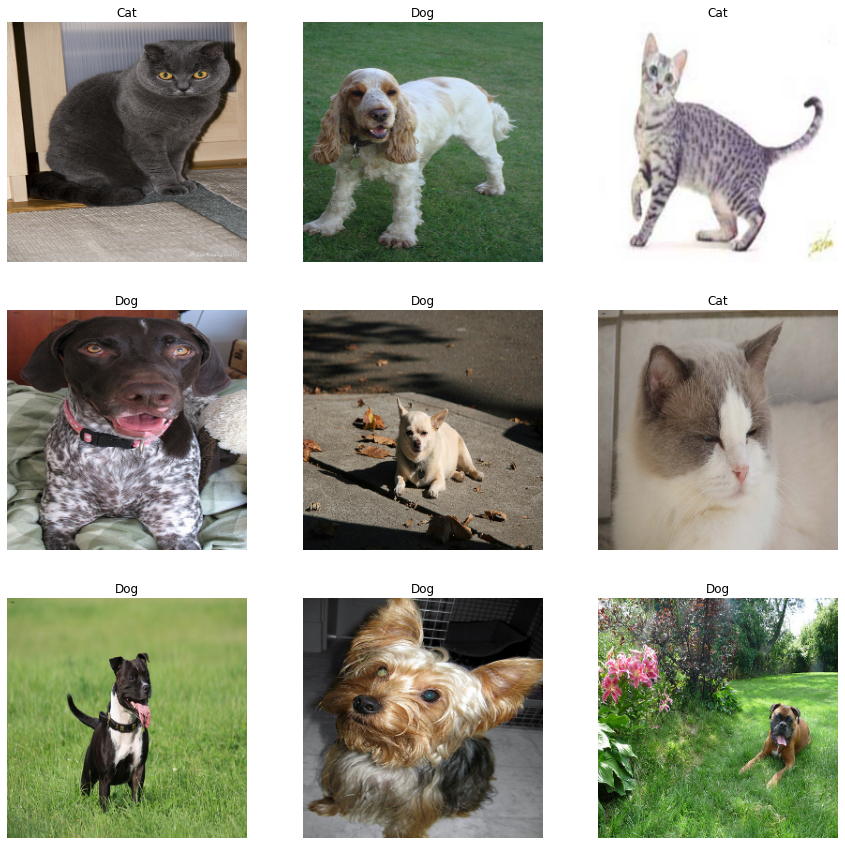

In [5]:
class_name = ['Cat', 'Dog']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15, 15))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break